In [57]:
using LinearAlgebra, RowEchelon, LaTeXStrings, Plots
include("LAcodes.jl")

Main.LAcodes

# 1. Linear Transformations

## 1.1 Basic Definitions and Theorems

**Definition:** A function $T : U \rightarrow V$ over scalars $\mathbb{F}$ is a **linear transformation** from a vector space $U$ to a vector space $V$ iff
* $\forall u_1, u_2 \in U \quad\quad\;\; T \;(u_1+v_1) = T u_1 + T v_1$, and
* $\forall u \in U, \forall \alpha \in \mathbb{F} \quad T\ (\alpha u) = \alpha T u$

**Remarks:** 
* The two conditions in this definition can be combined:
$$
\forall u_1, u_2 \in U, \; \forall \alpha,\beta \in \mathbb{F} \quad T\ (\alpha u_1 + \beta v_1) = \alpha\ T u_1 + \beta\ T u_2
$$
* $T$ maps a hyperplane in $U$ onto a hyperplane in $V$.

---
The main example of a linear transformation is $y = A x$, where the vectors $x \in \mathbb{F}^N, y \in \mathbb{F}^M$, and the matrix $A \in \mathbb{F}^{M \times N}$.

**Definition:** A function $f$ from a domain $U$ to a codomain $V$, i.e., $f : U \rightarrow V$ is
* **ONTO** or **surjective** iff $f(u) = v$ has a solution for every $v \in V$.
* **1-1** or **injective** iff $\forall u_1, u_2 \in U \quad f(u_1) = f(u_2) \Rightarrow u_1 = u_2$
* **1-1 and ONTO** or **bijective** iff it is both injective and surjective.

**Remarks:**
* ONTO means that the codomain of the function is equal to the range of the function
* 1-1 means that any vector $v$ in the range the equation $f(u) = v$ has a unique solution.

**Theorem:** Given $y = A x$, where the vectors $x \in \mathbb{F}^N, y \in \mathbb{F}^M$, and $A \in \mathbb{F}^{M \times N}$
* $y = A x$ is ONTO iff $A$ has a pivot in every row
* $y = A x$ is 1-1 iff $A$ has a pivot in every column

**Theorem:** A function is invertible iff it is both 1-1 and ONTO

---
**Example:**
* $y = A x$ with $A = \begin{pmatrix} 1 & 2 \\ 0 & 1 \end{pmatrix} \quad$ is both 1-1 and ONTO.
   It has inverse $A^{-1} = \begin{pmatrix} 1 & -2 \\ 0 & 1  \end{pmatrix}$
* $y = A x$ with $A = \begin{pmatrix} 1 & 2 & 3 \\ 0 & 2 & 3 \end{pmatrix} \quad$ is ONTO, but not 1-1
* $y = A x$ with $A = \begin{pmatrix} 1 & 2 \\ 0 & 2 \\ 0 & 0 \end{pmatrix} \quad$ is 1-1, but not ONTO
* $y = A x$ with $A = \begin{pmatrix} 1 & 2 \\ 0 & 0 \end{pmatrix} \quad$ is neither 1-1, nor ONTO

---
**Theorem:** The composition of linear transformations is linear.

**Notation:** let $S : U \rightarrow V$ and $T : v \rightarrow W$ be linear transformations, and let $u \in U$
    $$ T (S u) = T S u $$

### 1.1.1 Example of a linear transformation

Let $T(x_1, x_2, x_3) = (x_1 + x_3, x_1 - x_3)$ with $x_1, x_2, x_3 \in \mathbb{R}$<br>
Rewriting this in vector form, we see
$$
T \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} x_1 + x_3 \\ x_1 - x_3 \end{pmatrix}, \text{ i.e., }
T: \mathbb{R}^3 \rightarrow \mathbb{R}^2
$$
To show that $T$ is a linear transform, we need to start with two arbitrary vectors in $\mathbb{R}^3$, say
$u = ( u_1, u_2, u_3 ) \text{ and } v = ( v_1, v_2, v_3)$ and any scalar in $\mathbb{R}$, and verify the two conditions above:

* Verify $T(u+v) = T u + T v$<br>
$$\begin{align}
\xi =&  T (u+v) - T u - T v \\
    =& T \begin{pmatrix} u_1+v_1\\ u_2 + v_2 \\ u_3+v_3 \end{pmatrix}
     - T \begin{pmatrix} u_1 \\ u_2 \\ u_3 \end{pmatrix} - T \begin{pmatrix} v_1 \\ v_2 \\ v_3 \end{pmatrix} \\
    =& \begin{pmatrix} (u_1+v_1) + (u_3+v_3) \\  (u_1+v_1) - (u_3+v_3) \end{pmatrix}
     - \begin{pmatrix} u_1 + u_3 \\  u_1 - u_3 \end{pmatrix}
     - \begin{pmatrix} v_1 + v_3 \\  v_1 - v_3 \end{pmatrix} \\
    =& 0,
\end{align}$$ so the first condition holds.
* Verify $T ( \alpha u ) = \alpha T u$<br>
$$\begin{align}
\zeta =& T ( \alpha u ) - \alpha T u \\
      =& \begin{pmatrix} \alpha u_1 + \alpha u_3 \\  \alpha u_1 - \alpha u_3 \end{pmatrix}
      - \alpha \begin{pmatrix} u_1 + u_3 \\ u_1 - u_3 \end{pmatrix}
      \\
      =& 0,
\end{align}$$ so the second condition holds as well: This transformation is linear.

**Remark:** We could have shortened the proof by recognizing that $T$ can be expressed as a matrix multiplication
$$
T \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} x_1 + x_3 \\ x_1 - x_3 \end{pmatrix}
= \begin{pmatrix} 1& 0 &1 \\ 1 & 0 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix},
$$
which is known to be linear.

### 1.1.2 Example of a non-linear transformation

Let $T(x_1, x_2) = (x_1 + x_2, x_1 x_2, x_1 - x_2 )$ with $x_1, x_2 \in \mathbb{R}$<br>
Rewriting this in vector form, we see
$$
T \begin{pmatrix} x_1 \\ x_2  \end{pmatrix} = \begin{pmatrix} x_1 + x_2 \\ x_1 x_2 \\ x_1 - x_2 \end{pmatrix}, \text{ i.e., }
T: \mathbb{R}^2 \rightarrow \mathbb{R}^3
$$

To check whether $T$ is a linear transform, we need to start with two arbitrary vectors in $\mathbb{R}^2$, say
$u = ( u_1, u_2 ) \text{ and } v = ( v_1, v_2 )$ and any scalar in $\mathbb{R}$, and check the two conditions above:

* Verify $T(u+v) = T u + T v$<br>
$$\begin{align}
\xi =&  T (u+v) - T u - T v \\
    =& T \begin{pmatrix} u_1+v_1\\ u_2 + v_2 \end{pmatrix}
     - T \begin{pmatrix} u_1 \\ u_2  \end{pmatrix} - T \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} \\
    =& \begin{pmatrix} (u_1+v_1) + (u_2+v_2) \\  (u_1+v_1)(u_2+v_2) \\(u_1+v_1) - (u_2+v_2) \end{pmatrix}
     - \begin{pmatrix} u_1 + u_2 \\  u_1 u_2 \\ u_1 - u_2 \end{pmatrix}
     - \begin{pmatrix} v_1 + v_2 \\  v_1 v_2 \\ v_1 - v_2 \end{pmatrix} \\
    =& \begin{pmatrix} 0 \\ u_1 v_2 + u_2 v_1 \\ 0 \end{pmatrix},
\end{align}$$ so the first condition does not hold in general.

To verify this, construct a counter example.<br>
Let $u = (1 \; 0), \ v = (0 \; 1).$ We have
$$
T ( u + v ) - T u - T v \; = \; T \begin{pmatrix} 1\\1\end{pmatrix}-T \begin{pmatrix} 1\\0\end{pmatrix}-T \begin{pmatrix} 0\\1\end{pmatrix}  
\; =\;  \begin{pmatrix} 2 \\ 1 \\ 0 \end{pmatrix} - \begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix} - \begin{pmatrix} 1 \\ 0 \\ -1 \end{pmatrix}
\; = \; \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} \ne 0.
$$
Thus, $T$ is not a linear transformation.

### 1.1.3 Plots of Linear Transformations

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:8px;text-align:left;\">Linear Transformation 2D -> 2D: 180 deg rotation</p><p style=\"color:blue;font-size:12pt;height:15px;text-align:left;\">Plot on the same set of axes</p></div>")

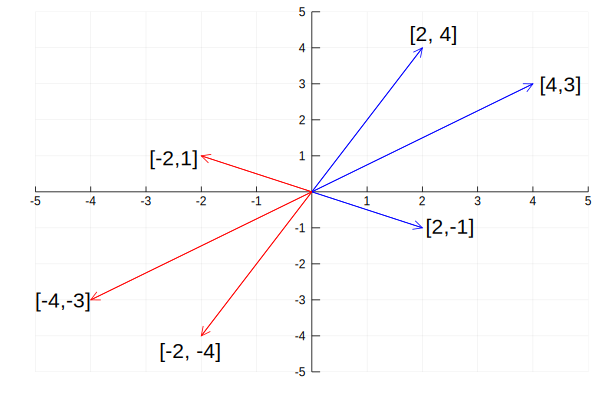

In [2]:
LAcodes.title( [ LAcodes.T("Linear Transformation 2D -> 2D: 180 deg rotation", sz=15, height=8),
                 LAcodes.T("Plot on the same set of axes", sz=12, height=15)
        ])

vecs = [ 2  2  4
         4 -1  3]

θ = 180
rvecs =  [ cosd(θ) -sind(θ); sind(θ) cosd(θ)] * vecs

x_vals = [0 0 0 ;
          vecs[1,:]']
y_vals = [0 0 0 ;
          vecs[2,:]']
rx_vals = [0 0 0 ;
          rvecs[1,:]']
ry_vals = [0 0 0 ;
          rvecs[2,:]']

plot(x_vals, y_vals, arrow = true, color = :blue,
     legend = :none, xlims = (-5, 5), ylims = (-5, 5),
     annotations = [(2.2, 4.4, "[2, 4]"),
                    (2.5, -0.95, "[2,-1]"),
                    (4.5, 3, "[4,3]")],
     xticks = -5:1:5, yticks = -5:1:5,
     framestyle = :origin)
plot!(rx_vals, ry_vals, arrow = true, color = :red,
     legend = :none, xlims = (-5, 5), ylims = (-5, 5),
     annotations = [(-2.2, -4.4, "[-2, -4]"),
                    (-2.5, 0.95, "[-2,1]"),
                    (-4.5, -3, "[-4,-3]")],
     xticks = -5:1:5, yticks = -5:1:5,
     framestyle = :origin)

## 1.2 Coordinate Vectors

<div style="background-color:#F2F5A9">

Consider the finite-dimensional vector space $V$ over the scalars $\mathbb{F}$ with a basis $\left\{ v_1, v_2, \dots v_N \right\}$.<br>
Thus, any vector $v \in V$ can be expressed as $v = \sum_{i=1}^N{\alpha_i v_i}$, where the scalars $\alpha_i, i=1,\dots N$ are unique.

We construct the following transformation $D_v : V \rightarrow \mathbb{F}^N$:
$$
D_v( \alpha_1 v_1 + \alpha_2 v_2 \dots + \alpha_N v_N ) = \begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_N \end{pmatrix}
$$
**This transformation is easily shown to be linear, 1-1 and ONTO (and hence invertible).**

The vector of the coefficients $\alpha_i, i=1,2,\dots N$ is called the **coordinate vector**.
</div>

**Example**: Consider $\mathscr{P}_2(-\infty,\infty) = span\{ 1, x, x^2 \}$. We previously proved that the powers of $x$ are linearly independent.
* Given $p(x) = 3 + 5 x + 8 x^2$, the coordinate vector is $D_v \left( p(x) \right) = (3, 5, 8)$.
* Given the coordinate vector $v = (-2, 0, 3),$ the polynomial $D_v^{-1}(v) = -2 + 0 x + 3 x^2 = -2 + 3 x^2.$

**Remarks:**
* The coordinate vector transform $D_v$ yields a vector in $\mathbb{F}^N$: **we can think of any vector as a point in $N$-space.**
* Instead of computing linear combinations in $V$, **we can do the computations in** $\mathbb{F}^N$, e.g.,<br>
consider $p_1(x) = 3+x+2 x^2$, $p_2(x) = 1+3 x - 3 x^2$. Then
$$
   2 p_1(x) - p_2(x) \xrightarrow{D_v} 2 D_v \ p_1(x) - D_v \ p_2(x) = 2 \begin{pmatrix} 3 \\ 1 \\ 2 \end{pmatrix} -
   \begin{pmatrix} 1\\3\\-3\end{pmatrix} =\begin{pmatrix} 5 \\ -1 \\ 1 \end{pmatrix}  \xrightarrow{D_v^{-1}} 5 -x +x^2
$$
Instead of adding vectorsdirectly, we can add their coordinate vectors instead.
* $V$ and $\mathbb{F}^N$ are said to be **isomorphic**, i.e., to have the same shape.
* The basis vectors in $V$ are represented by the standard basis vectors in $\mathbb{F}^N$. For our example, we have
$$
p_0(x) = 1 \xrightarrow{D_v} \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
\quad p_1(x) = x \xrightarrow{D_v} \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}, \quad \text{and }
\quad p_2(x) = x^2 \xrightarrow{D_v} \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}
$$

# 2. Matrix Representation of a Linear Transformation

## 2.1. $T: \mathbb{F}^N \rightarrow \mathbb{F}^N$

A vector in $\mathbb{F}^N$ can be trivially expressed in the **standard basis**
$$
e_1 = \begin{pmatrix} 1\\ 0 \\ \vdots \\ 0 \end{pmatrix}, \quad
e_2 = \begin{pmatrix} 0\\ 1 \\ \vdots \\ 0 \end{pmatrix}, \quad \dots \quad
e_N = \begin{pmatrix} 0\\ 0 \\ \vdots \\ 1 \end{pmatrix},
$$

namely
$$
b = \begin{pmatrix} b_1\\ b_2\\ \vdots \\ b_N \end{pmatrix} =
b_1 e_1 + b_2 e_2 \dots + b_N e_N.
$$

If we apply a linear transformation $T : \mathbb{F}^N \rightarrow \mathbb{F}^M$ to $b$,
we find
$$
T b = b_1 T e_1 + b_2 T e_2 + \dots b_N e_N
= \left( T e_1 \; T e_2 \; \dots T e_n \right) b
$$

**If we compute $T e_i, i=1,2, \dots N$ and write the results into a matrix as columns,
we can compute $T b$ by applying this matrix to $b$.**

Transformations that are known to be linear include
* dilations $T x = \alpha x$ for some scalar $\alpha$.
* rotations
* reflection 
* projection
* shearing

**Basic Tools:**
* A point a distance $r$ from the origin at an angle $\theta$ with respect to the x axis has coordinates $( r cos \theta, \; r sin \theta )$
* congruent triangles


### 2.1.1 A rotation in 2D

Consider a rotation $R$ by an angle $\theta$:
$$
\begin{align}
\left( \begin{matrix} 1 \\ 0 \end{matrix} \right) \xrightarrow{R} &  \left( \begin{matrix} \cos \theta \\ \sin \theta \end{matrix} \right)\\
\left( \begin{matrix} 0 \\ 1 \end{matrix} \right) \xrightarrow{R} &  \left( \begin{matrix} \cos ( \theta + \frac{\pi}{2} )\\ \sin ( \theta + \frac{\pi}{2} ) \end{matrix} \right)   = \left( \begin{matrix} - \sin \theta \\ \cos \theta \end{matrix} \right) \\
\end{align}
$$

Assembling the rotation matrix, we have
$$
\left( \begin{matrix} x' \\y' \end{matrix} \right) = \left( \begin{matrix}  \cos \theta & - \sin \theta\\ \sin \theta & \cos \theta \end{matrix} \right) \left( \begin{matrix} x\\y\end{matrix} \right)
$$

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:8px;text-align:left;\">\$Linear\\ Transformation\\ \\mathbb{R}^2\\ \\rightarrow\\ \\mathbb{R}^2:\\; rotation\\ by\\ \\theta\\ radians\$</p><p style=\"color:blue;font-size:12pt;height:15px;text-align:left;\">Plot on different sets of axes</p></div>")

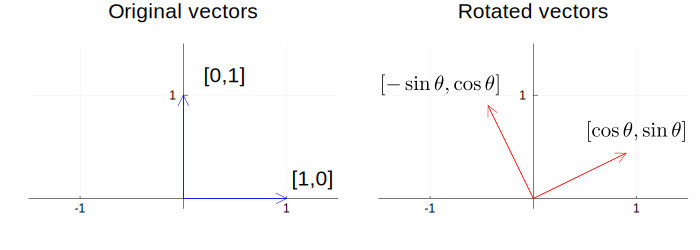

In [3]:
LAcodes.title( [ LAcodes.T( L"Linear\ Transformation\ \mathbb{R}^2\ \rightarrow\ \mathbb{R}^2:\; rotation\ by\ \theta\ radians", sz=15, height=8),
                 LAcodes.T("Plot on different sets of axes", sz=12, height=15)
        ])

vecs = [ 1  0
         0 1]

θ = 26
rvecs =  [ cosd(θ) -sind(θ); sind(θ) cosd(θ)] * vecs

x_vals = [0 0 ;
          vecs[1,:]']
y_vals = [0 0 ;
          vecs[2,:]']
rx_vals = [0 0 ;
          rvecs[1,:]']
ry_vals = [0 0 ;
          rvecs[2,:]']
plot(
plot(x_vals, y_vals, arrow = true, color = :blue,
     legend = :none, xlims = (-1.5, 1.5), ylims = (-.1, 1.5), title = "Original vectors",
     annotations = [(1.25, 0.2, "[1,0]"),
                    (0.4, 1.2,    "[0,1]")],
     xticks = -5:1:5, yticks = -5:1:5, axis_ratio=:equal,
     framestyle = :origin),
plot(rx_vals, ry_vals, arrow = true, color = :red,
     legend = :none, xlims = (-1.5, 1.5), ylims = (-.1, 1.5), title="Rotated vectors",
     annotations = [(1., 0.65, L"[\cos \theta, \sin \theta]"),
                    (-0.9, 1.1, L"[-\sin \theta, \cos \theta]")],
     xticks = -5:1:5, yticks = -5:1:5, axis_ratio=:equal,
     framestyle = :origin), size=(700,250)
)

### 2.1.2 Reflection with respect to a line

Consider the reflection of a point $A$ with respect to a a line $y = x\; \tan \phi$, as shown in the following diagram:

<img src="./LinTxSymLine.svg"  width="200">

Observe that the triangles OCA and OCB are congruent:
* The angles $\angle OCB = \angle OCA = 90^\circ$
* The side $OC$ is in common
* The side $AC = CB$ by construction

Given a point $A$ at $(r \cos \theta, r \sin \theta)$, we see that the reflected point $B$ has coordinates
$\left(r \cos ( 2 \phi - \theta ), r \sin ( 2 \phi- \theta) \right)$

Consequently,
$$
\begin{align}
\begin{pmatrix} 1\\0\end{pmatrix} &\rightarrow \begin{pmatrix} \cos (2\phi)\\ \sin (2\phi)\end{pmatrix} \\
\begin{pmatrix} 0\\1\end{pmatrix} &\rightarrow \begin{pmatrix} \; \sin (2\phi)\\ -\cos (2\phi)\end{pmatrix} \\
\end{align}
$$
The transformation is therefore given by
$$
\begin{pmatrix} x' \\ y' \end{pmatrix} 
= \begin{pmatrix} \cos (2\phi) & \sin (2\phi) \\ \sin (2\phi) & -\cos (2\phi) \end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix} 
$$

**Remark:**<br>
This problem is simple enough that we can write down the solution directly:
$$
\begin{pmatrix} x' \\ y' \end{pmatrix} = \begin{pmatrix} r \cos(2 \phi - \theta) \\ r \sin( 2 \phi -\theta)\end{pmatrix}
= \begin{pmatrix} r \cos(2\phi) \cos(\theta)+ r \sin(2\phi) \sin(\theta) \\ r \sin(2\phi) \cos(\theta)- r \cos(2\phi)\sin(\theta) \end{pmatrix}
= \begin{pmatrix} \cos( 2 \phi) & \sin( 2 \phi) \\ \sin(2\phi) & - \cos(2\phi) \end{pmatrix}
  \begin{pmatrix} r \cos(\theta) \\ r \sin(\theta) \end{pmatrix}
= \begin{pmatrix} \cos( 2 \phi) & \sin( 2 \phi) \\ \sin(2\phi) & - \cos(2\phi) \end{pmatrix}
  \begin{pmatrix} x \\ y \end{pmatrix}
$$

### 2.1.3 Orthogonal Projection onto a Line

The previous figure still applies: The orthogonal projection of $A$ onto the line $(L)$ is $C$.
Using the right triangles $OAC$ and $OCB$ to determine the lengths of $OC$, we have
$$
\begin{align}
\begin{pmatrix} 1\\0\end{pmatrix} & \rightarrow \cos \phi \begin{pmatrix} \cos \phi \\ \sin \phi \end{pmatrix}\\
\begin{pmatrix} 0\\1\end{pmatrix} & \rightarrow \sin \phi \begin{pmatrix} \cos \phi \\ \sin \phi \end{pmatrix} \\
\end{align}
$$
Thus
$$
\begin{pmatrix}x' \\ y' \end{pmatrix} =
\begin{pmatrix} \cos^2 \phi & \cos \phi \sin\phi \\ \cos\phi \sin\phi & \sin^2 \phi \end{pmatrix}
\begin{pmatrix}x \\ y \end{pmatrix}
$$

**Remark:**<br>
The problem is again simple enough so we can write the solution directly: we observe $OC = OA + \frac{1}{2} AB$. Therefore, using the reflection result above

$$
\begin{pmatrix}x' \\ y' \end{pmatrix} = \begin{pmatrix}x \\ y \end{pmatrix}
+ \frac{1}{2} \left( \;
 \begin{pmatrix} \cos (2\phi) & \sin (2\phi) \\ \sin (2\phi) & -\cos (2\phi) \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}
- \begin{pmatrix} x \\ y \end{pmatrix}
\;\right)
= \frac{1}{2} \begin{pmatrix} 1+\cos ( 2\phi) & \sin ( 2\phi)\\ \sin (2\phi) & 1 - \cos ( 2\phi)\end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}
$$

which is identical to the previous result due to some basic trigonometric identities.

## 2.2 $T : U \rightarrow V$

The computations shown above are readily extended to linear transformations from an $N$ dimensional vector space $U$ over the scalars $\mathbb{F}$ to
an $M$ dimensional vector space $V$ over the scalars $\mathbb{F}$ by using coordinate vectors.

The relationship between the various spaces is as follows:


<img src="./LinTxCd.svg"  width="250">

The composition of linear transformations is a linear transformation. We therefore have the following linear transformations
$$
\begin{align}
\mathbb{F}^N \xrightarrow{D_u^{-1}} U \xrightarrow{T} V \xrightarrow{D-v} {\mathbb{F}^M}\\
U \xrightarrow{D_u} \mathbb{F}^N \xrightarrow{A_T} \mathbb{F}^M \xrightarrow{D_v^{-1}} V
\end{align}
$$
* The first of these is used to determine a matrix representation $A_T$ of size $M \times N$ of this transformation.
* The second of these can be used to apply the transformation $T$ to any vector in $U$ using this matrix.

2.2.1 A linear transformation defined for polynomials

#### Derivation

Consider $U = \mathscr{P}_2(\infty,-\infty)$ the vector space of polynomials of degree $\le 2$, and the transformation $T p(x) = 6 \int_0^x {p(t)\ dt} + 3 x \frac{d}{dx} p(x)$ with scalars in $\mathbb{R}$.<br>

$\quad\quad$A codomain for this transformation is $V = \mathscr{P}_3(\infty,-\infty)$,  the vector space of polynomials of degree $\le 3$.

$\quad\quad$Thus $T : \mathscr{P}_2(\infty,-\infty) \rightarrow \mathscr{P}_3(\infty,-\infty)$, a transformation from a 3-dimensional vector space to a 4-dimensional vector space.

We need to accomplish several steps to obtain a matrix representation of this transformation.
* Is $T$ linear? Let $p_1, p_2$ be any two ploynomials in $U$, and any $\alpha$ in $\mathbb{R}$.
$$\begin{align}
T (p_1 + p_2) - T p_1 - T p_2 &= \left( 6 \int_0^x {\left(p_1(t)+p_2(t)\right)\ dt} + 3 x \left( (p_1+p_2)' \right) \right)
                               - \left( 6 \int_0^x {p_1(t)\ dt}                     + 3 x p_1' \right)
                               - \left( 6 \int_0^x {p_2(t)\ dt}                     + 3 x p_2' \right) &= 0\\
T (\alpha p_1 ) - \alpha T p_1 &=  \left( 6 \int_0^x {\alpha p_1(t)\ dt}                     + 3 x (\alpha p_1)' \right)
                                 - \alpha  \left( 6 \int_0^x {p_1(t)\ dt}                     + 3 x p_1' \right) &= 0
\end{align}
$$
<br>
Since $T$ is a linear transformation from a 3-dimensional vector space to a 4-dimensional vector space, it can be represented by a matrix.
* Next, we need to choose bases for $U$ and $V$, and define the coordinate transforms.
    * A basis for $\mathscr{P}_2(\infty,-\infty)$ is $\left\{ 1, x, x^2 \right\}$: $\quad\quad$
      Let $D_u( \alpha + \beta x + \gamma x^2 ) \quad\quad \; = \begin{pmatrix} \alpha & \beta & \gamma \end{pmatrix}^t.$
    * A basis for $\mathscr{P}_3(\infty,-\infty)$ is $\left\{ 1, x, x^2,x^3 \right\}$:$\quad$
      Let $D_u( \alpha + \beta x + \gamma x^2 + \delta x^3) = \begin{pmatrix} \alpha & \beta & \gamma & \delta \end{pmatrix}^t.$

* We can now compute the matrix $A_T$:
$$
\begin{align}
\begin{pmatrix} 1\\0\\0 \end{pmatrix} &\;\xrightarrow{D_u^{-1}}\; p_1(x) = 1   &\xrightarrow{T}&\; \tilde{p_1}(x) = 6 x &\xrightarrow{D_v}\; \begin{pmatrix}0\\6\\0\\0\end{pmatrix}\\
\begin{pmatrix} 0\\1\\0 \end{pmatrix} &\;\xrightarrow{D_u^{-1}}\; p_2(x) = x   &\xrightarrow{T}&\; \tilde{p_1}(x) = 3 x^2+3x &\xrightarrow{D_v}\; \begin{pmatrix}0\\3\\3\\0\end{pmatrix}\\
\begin{pmatrix} 0\\0\\1 \end{pmatrix} &\;\xrightarrow{D_u^{-1}}\; p_3(x) = x^2 &\xrightarrow{T}&\; \tilde{p_1}(x) = 2 x^3+6x^2 &\xrightarrow{D_v}\; \begin{pmatrix}0\\0\\6\\2\end{pmatrix}\\
\end{align}
$$

$$
A_T = \begin{pmatrix}0&0&0 \\ 6&3&0\\ 0&3&6 \\ 0&0&2 \end{pmatrix}
$$

**Remarks:**
* The transformation is therefore 1-1, but not ONTO: $\quad T p(x) = \alpha \quad$ does not have a solution for any $\alpha \in \mathbb{R}.$
* We could have chosen the codomain $V = span \left\{ x, x^2, x^3 \right\}$, in which case the transformation would have been invertible.

<br>

**Additional Remark:** A non-linear transformation defined for polynomials:<br>
$\quad\quad$Consider instead the transformation  $T p(x) = \int_0^x {\left(1+p(t)\right)\ dt} + 3 x \frac{d}{dx} p(x)$.
<br>
$\quad\quad$Let $p_1, p_2$ be any two ploynomials in $U$. We find
$$
T (p_1 + p_2) - T p_1 - T p_2 = \left( \int_0^x {(1+p_1+p_2) dt}+ 3 x (p_1+p_2)' \right) -\left( \int_0^x {(1+p_1)dt} + 3 x p_1' \right)-\left( \int_0^x {(1+p_2)dt} + 3 x p_2' \right) = - x.
$$
<br>
$\quad\quad$Since this transformation is not linear on $U,$ it does not have a matrix representation.

#### Implementation

In [4]:
LAcodes.title("Compute T using Sympy:", sz=15, height=15)
using SymPy, Latexify
x=symbols("x")
function t(p)
    p̃ = 6*integrate(p, x)+3*x*diff(p,x)
    expand(p̃)
end
for p in [x^0, x^1, x^2]
    p̃ = t(p)
    println( p,"\t ->\t $p̃ \t\t -> \t $(latexify(p̃))")
end

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:15px;text-align:left;\">Compute T using Sympy:</p></div>")

1	 ->	 6*x 		 -> 	 $6*x$
x	 ->	 3*x^2 + 3*x 		 -> 	 $3*x^2 + 3*x$
x^2	 ->	 2*x^3 + 6*x^2 		 -> 	 $2*x^3 + 6*x^2$


We now use the linear transformation we have defined.

In [5]:
LAcodes.title("Set up coefficient vector transformations (these work for both D_u and D_v)", sz=15,height=15)

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:15px;text-align:left;\">Set up coefficient vector transformations (these work for both D_u and D_v)</p></div>")

In [6]:
function D(p, d=nothing)
    if d == nothing
        return N.([p(x=>0); [p.coeff(x^i) for i in 1:N(degree(p,gen=x))] ])
    end
    N.([p(x=>0); [p.coeff(x^i) for i in 1:d] ])
end
function Dinv(v)
    p = 0
    for (i,c) in enumerate(v)
        p += c*x^(i-1)
    end
    p
end
if false
    p = x+3*x^2
    println( "Test for $p" )
    println( ".  D(p)   = $(D(p))")
    println( ".  Dinv(D(p)) - p  = $(Dinv(D(p))-p)")
    D(Dinv(D(p)))'
end

In [7]:
LAcodes.title("Define A_T", sz=15,height=15)
A_T = [0 0 0; 6 3 0; 0 3 6; 0 0 2]

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:15px;text-align:left;\">Define A_T</p></div>")

4×3 Array{Int64,2}:
 0  0  0
 6  3  0
 0  3  6
 0  0  2

In [8]:
LAcodes.title( "Use it for a polynomial", sz=15, height=15)
function useA(p) p_u = D(p); p̃_v = A_T * p_u; p̃ = Dinv( p̃_v ); p̃ end
    
p = 1 + 2x + 3x^2
display(p)
println("Using T directly, we get:  ", t(p) )
println("Using A, we get:           $(useA(p))");

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:15px;text-align:left;\">Use it for a polynomial</p></div>")

   2          
3⋅x  + 2⋅x + 1

Using T directly, we get:  6*x^3 + 24*x^2 + 12*x
Using A, we get:           6*x^3 + 24*x^2 + 12*x


In [9]:
LAcodes.title("Automate A_T computation", sz=15, height=15)
function get_AT( t, dim_U, Du, Du_inv, dim_V, Dv, Dv_inv )
    A = Array{Float64}( undef, dim_V, dim_U )

    for i in 1:dim_U
        v = zeros(Float64, dim_V); v[i] = 1.
        p = Du_inv( v )
        p̃ = t(p)
        A[:,i] = Dv( p̃ )
    end
    A
end
A_T = Int64.(get_AT( t, 3, x->D(x,4), Dinv, 4, x->D(x,3), Dinv))
A_T

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:15px;text-align:left;\">Automate A_T computation</p></div>")

4×3 Array{Int64,2}:
 0  0  0
 6  3  0
 0  3  6
 0  0  2

### 2.2.2 Application

We can now use the matrix representation to do computations with matrix library code: consider
$$
\tilde{p} \xrightarrow{D_v^{-1}} v \xrightarrow{ u = A_T \text{\\} v } u \xrightarrow{D_u^{-1}} p
$$

Given a polynomial $\tilde{p}(x) \in V$, this computation yields a polynomial $p(x) \in U$
such that $T p(x) = \tilde{p}(x).$
To find all possible preimages, we need to include the homogeneous solution.

In [22]:
LAcodes.title( "A preimage of T", sz=15, height=15)
p̃ = 2x^3 - 3x^2 + 6x
v = D(p̃, 3)
u = A_T \ v
p = Dinv(u)
println( "Preimage( $p̃ )  =  $p" )

println( "The preimage is unique since T is 1-1:  $(isempty(nullspace(A_T)))")

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:15px;text-align:left;\">A preimage of T</p></div>")

Preimage( 2*x^3 - 3*x^2 + 6*x )  =  1.0*x^2 - 3.0*x + 2.5
The preimage is unique since T is 1-1:  true


In [11]:
LAcodes.title("check the error")
t(p)-p̃

HTML{String}("<div><p style=\"color:blue;font-size:20pt;height:15px;text-align:left;\">check the error</p></div>")

                      3                         
4.44089209850063e-16⋅x  - 1.77635683940025e-15⋅x